<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

### Project Structure:

The hands on project on Predict Employee Churn with Decision Trees and Random Forests is divided into the following tasks:

#### Task 1: Introduction and Import Libraries 

Introduction to the data set and the problem overview.

See a demo of the final product you will build by the end of this project.

Import essential modules and helper functions from NumPy, Matplotlib, and scikit-learn.

#### Task 2: Exploratory Data Analysis

Load the employee dataset using pandas

Explore the data visually by graphing various features against the target with Matplotlib.

#### Task 3: Encode Categorical Features

The dataset contains two categorical variables: Department and Salary.
    
Create dummy encoded variables for both categorical variables.

#### Task 4: Visualize Class Imbalance

Use Yellowbrick's Class Balance visualizer to create a frequency plot of both classes.

The presence or absence of a class balance problem will inform your sampling strategory while creating training and validation 

#### Task 5: Create Training and Validation Sets

Split the data into a 80/20 training/validation split.

Use a stratified sampling strategy

#### Tasks 6 & 7: Build a Decision Tree Classifier with Interactive Controls


Use the interact function to automatically create UI controls for function arguments.
Build and train a decision tree classifier with scikit-learn.

Calculate the training and validation accuracies.

Display the fitted decision tree graphically

#### Task 8: Build a Random Forest Classifier with Interactive Controls

Use the interact function again to automatically create UI controls for function arguments.

To overcome the variance problem associated with decision trees, build and train a random forests classifier with scikit-learn.
Calculate the training and validation accuracies.

Display a fitted tree graphically

### Task 9: Feature Importance Plots and Evaluation Metrics

Many model forms describe the underlying impact of features relative to each other.

Decision Tree models and Random Forest in scikit-learn, featureimportances attribute when fitted.

Utilize this attribute to rank and plot the features.

### Task 1: Import Libraries
---

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [3]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving employee_data.csv to employee_data (2).csv


In [4]:

import pandas as pd 
import io 
  
hr = pd.read_csv(io.BytesIO(uploaded['employee_data.csv'])) 


In [7]:
pip install -U pandas-profiling

     |████████████████████████████████| 266kB 5.2MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 3.1MB 11.5MB/s 
     |████████████████████████████████| 604kB 44.5MB/s 
     |████████████████████████████████| 296kB 46.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=842cc17e7c1e7dc30fb68447a941394034bb7bf21989e9efe7763d65e11fc2a9
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=62a72945e70a8ef4766876f12993ef14acd3813ebebe904e4bb138536f0418bd
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [5]:
hr.profile_report(title="Employee Data")

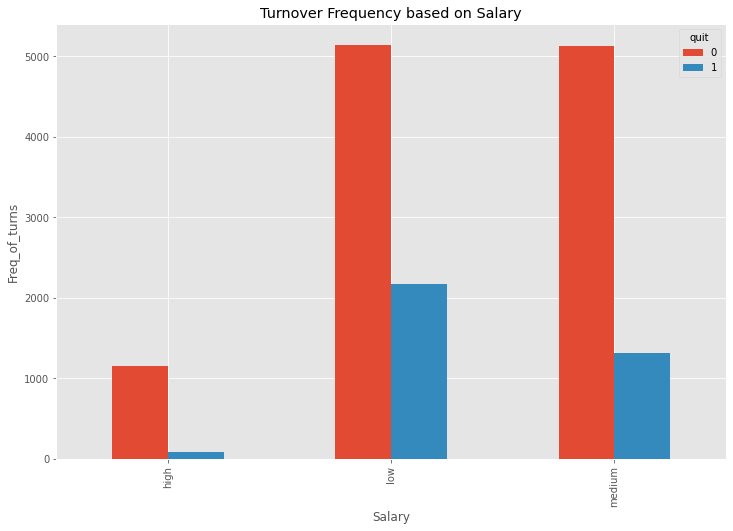

In [6]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')
plt.title("Turnover Frequency based on Salary")
plt.xlabel("Salary")
plt.ylabel("Freq_of_turns")
plt.show()
#Much less frequency of turnover at higher salary

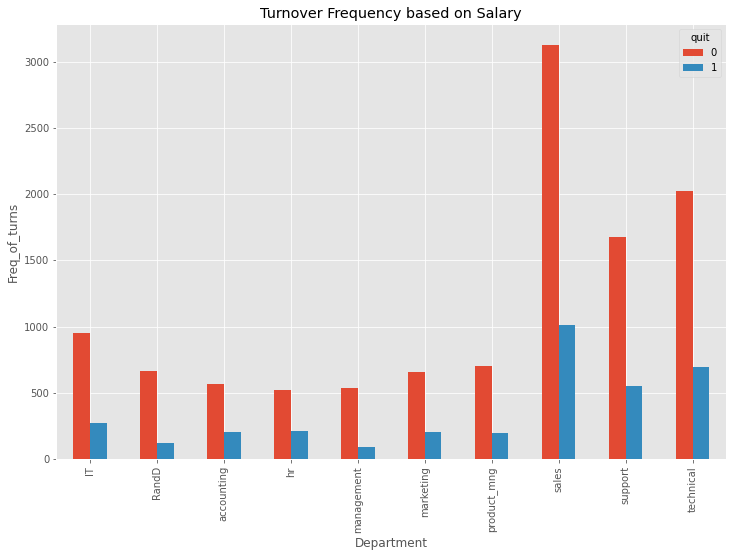

In [7]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar')
plt.title("Turnover Frequency based on Salary")
plt.xlabel("Department")
plt.ylabel("Freq_of_turns")
plt.show()

### Task 3: Encode Categorical Features
---

In [8]:
cat_vars = ['department','salary']
for var in cat_vars:
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr=hr.join(cat_list)

In [9]:
cat_vars

['department', 'salary']

In [10]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [11]:
hr.drop(columns=['department','salary'], axis=1, inplace=True)

In [12]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Task 4: Visualize Class Imbalance
---

In [20]:
pip install -U yellowbrick

     |████████████████████████████████| 276kB 5.3MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [13]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

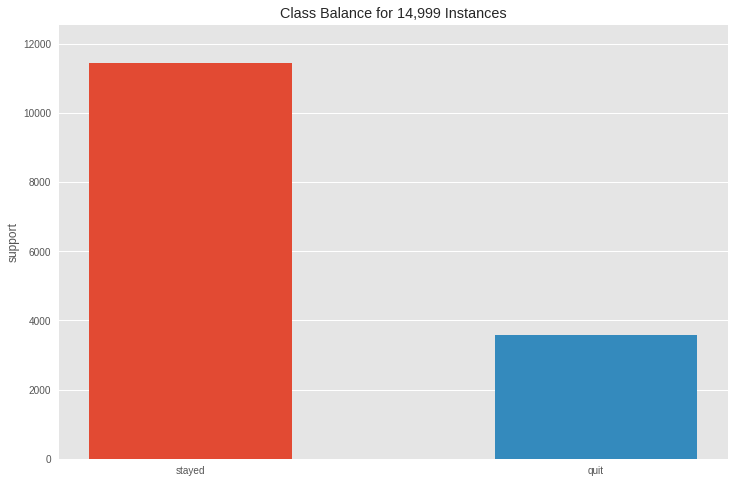

In [14]:
visualizer = ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

### Task 5: Create Training and Test Sets
---

In [15]:
X = hr.loc[:, hr.columns != 'quit']
y = hr.quit

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](https://github.com/daniel-dc-cd/data_science/blob/master/daily_materials/tree_forest/assets/partition-feature-space.png?raw=1)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

Gini index and entropy are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node. Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.

Splitting: It is a process of dividing a node into two or more sub-nodes. Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node. Leaf/Terminal Node: Nodes do not split is called Leaf or Terminal node.

In [18]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=1,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion=crit,
                                      splitter=split,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Acc:{:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Acc:{:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    
    
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed', 'quit'],
                                       filled=True))
    
    display(Image(data=graph.pipe(format='png')))
    
    #do later
    return estimator 

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [19]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=7,value=2, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = RandomForestClassifier(random_state=0,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=1,
                                       verbose=False).fit(X_train, y_train)
    
    estimator.fit(X_train, y_train)

    print('Random Forest Training Acc:{:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Acc:{:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree=estimator.estimators_[1]
    print('Visualizing Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'],
                                        filled=True))
    
    display(Image(data=graph.pipe(format='png')))
    
        #do later
    return estimator 
   

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [20]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

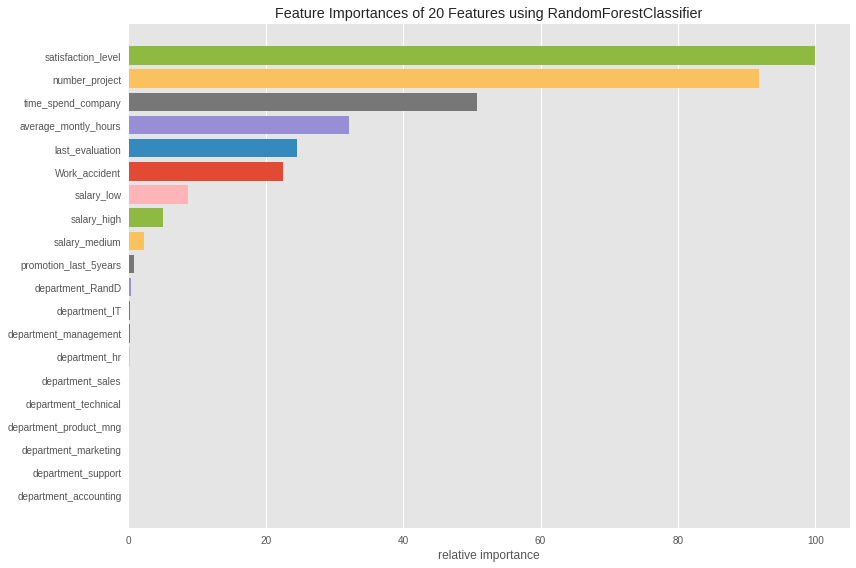

In [21]:
rf = RandomForestClassifier(bootstrap='True', 
                            max_depth=2, 
                            n_jobs=1, 
                            random_state=0,
                            verbose=False)
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

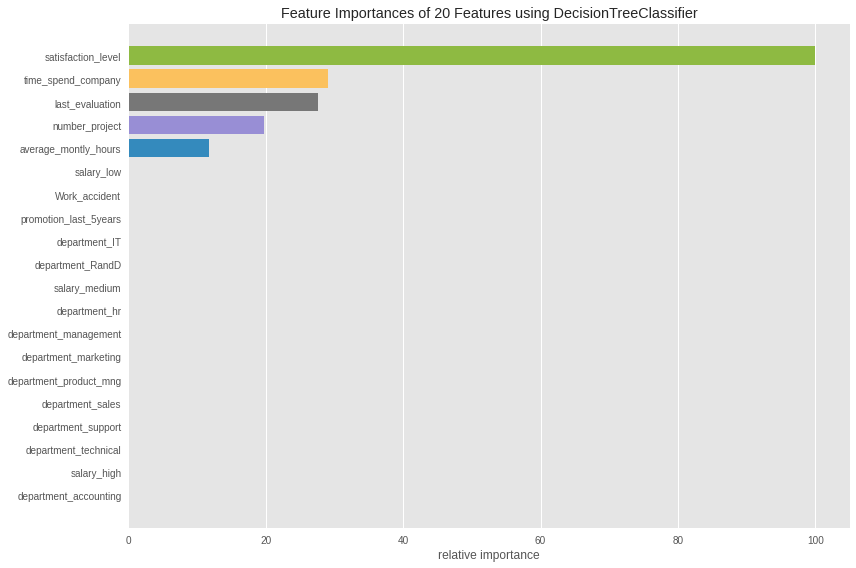

In [22]:
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()